In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium

In [2]:
df = pd.read_csv('C:/Users/hudso/Downloads/invasao_alienigena.csv')

In [3]:
df

,latitude,longitude,data,ataque_vitimas,ataque_danos,cidade
0,-23.550520,-46.633308,2023-01-05,47,27,São Paulo
1,-22.908333,-43.196388,2023-01-10,56,63,Rio de Janeiro
2,-23.682160,-46.875492,2023-01-15,85,30,Osasco
3,-23.697486,-46.735683,2023-01-20,97,19,Santos
4,-25.428954,-49.267137,2023-01-25,70,68,Curitiba
...,...,...,...,...,...,...
135,-16.700000,-49.274167,2024-12-10,37,63,Goiânia
136,-7.229722,-35.880000,2024-12-15,62,88,João Pessoa
137,-5.788056,-35.211667,2024-12-20,85,90,Natal
138,-8.048333,-34.872500,2024-12-25,74,74,Recife


In [4]:
#-Verifique o número total de ataques alienígenas.

duplicate_rows = df[df.duplicated()]

if duplicate_rows.shape[0] == 0:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found:")
    print(duplicate_rows)
Number_Of_Attacks = df.shape[0]
print(f'O número total de ataques foi: {Number_Of_Attacks}')

No duplicate rows found.
O número total de ataques foi: 140


In [5]:
#-Calcule e exiba a média, mediana e desvio padrão do número de vítimas.

mean = df['ataque_vitimas'].mean()
median = np.median(df['ataque_vitimas'])
std_deviation = np.std(df['ataque_vitimas'])
print(f'A média de vítimas foi: {mean:.2f}, a mediana: {median:.2f} e o desvio padrão: {std_deviation:.2f}')

A média de vítimas foi: 56.62, a mediana: 56.50 e o desvio padrão: 25.62


In [6]:
#Determine a cidade com o maior número de vítimas e a cidade com o menor número de vítimas.

most_victims = df.loc[df['ataque_vitimas'].idxmax(), ['cidade', 'ataque_vitimas']] # type: ignore
less_victms = df.loc[df['ataque_vitimas'].idxmin(), ['cidade', 'ataque_vitimas']] # type: ignore
print(f'Maior número de vítimas:\n {most_victims}')
print(f'Menor número de vítimas:\n  {less_victms}')

Maior número de vítimas:
 cidade            Fortaleza
ataque_vitimas          100
Name: 24, dtype: object
Menor número de vítimas:
  cidade            Belo Horizonte
ataque_vitimas                10
Name: 85, dtype: object


In [7]:
#-Verifique a data do primeiro e do último ataque registrado

FirstAttack = df.loc[df['data'].idxmin(), ['cidade', 'data']] # type: ignore
LastAttack = df.loc[df['data'].idxmax(), ['cidade', 'data']] # type: ignore
print(f'O primeiro ataque foi em: \n {FirstAttack}')
print(f'O último ataque foi em: \n {LastAttack}')

O primeiro ataque foi em: 
 cidade     São Paulo
data      2023-01-05
Name: 0, dtype: object
O último ataque foi em: 
 cidade      Salvador
data      2024-12-30
Name: 139, dtype: object


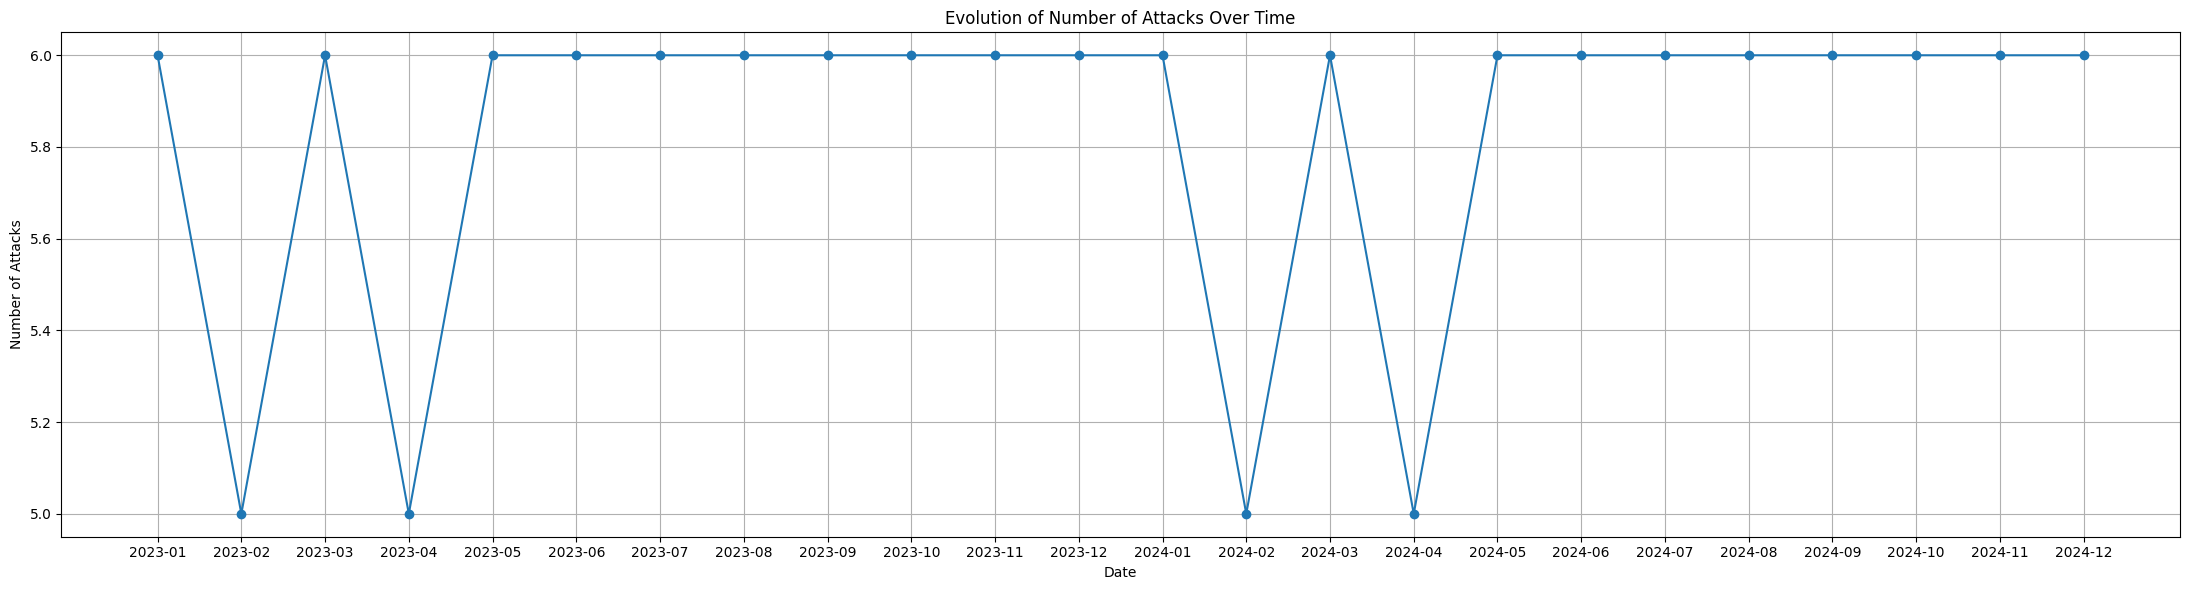

In [8]:
#-Crie um gráfico de linha que mostre a evolução do número de ataques ao longo do tempo.
df['data'] = pd.to_datetime(df['data'])
df['month'] = df['data'].dt.to_period('M')
monthly_counts = df['month'].value_counts().sort_index()
# Convert Period objects to strings for plotting
monthly_counts.index = monthly_counts.index.strftime('%Y-%m') # type: ignore
plt.figure(figsize=(22, 6))  # Adjust the figure size as needed
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-') # type: ignore
plt.title('Evolution of Number of Attacks Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.tight_layout()
plt.show()

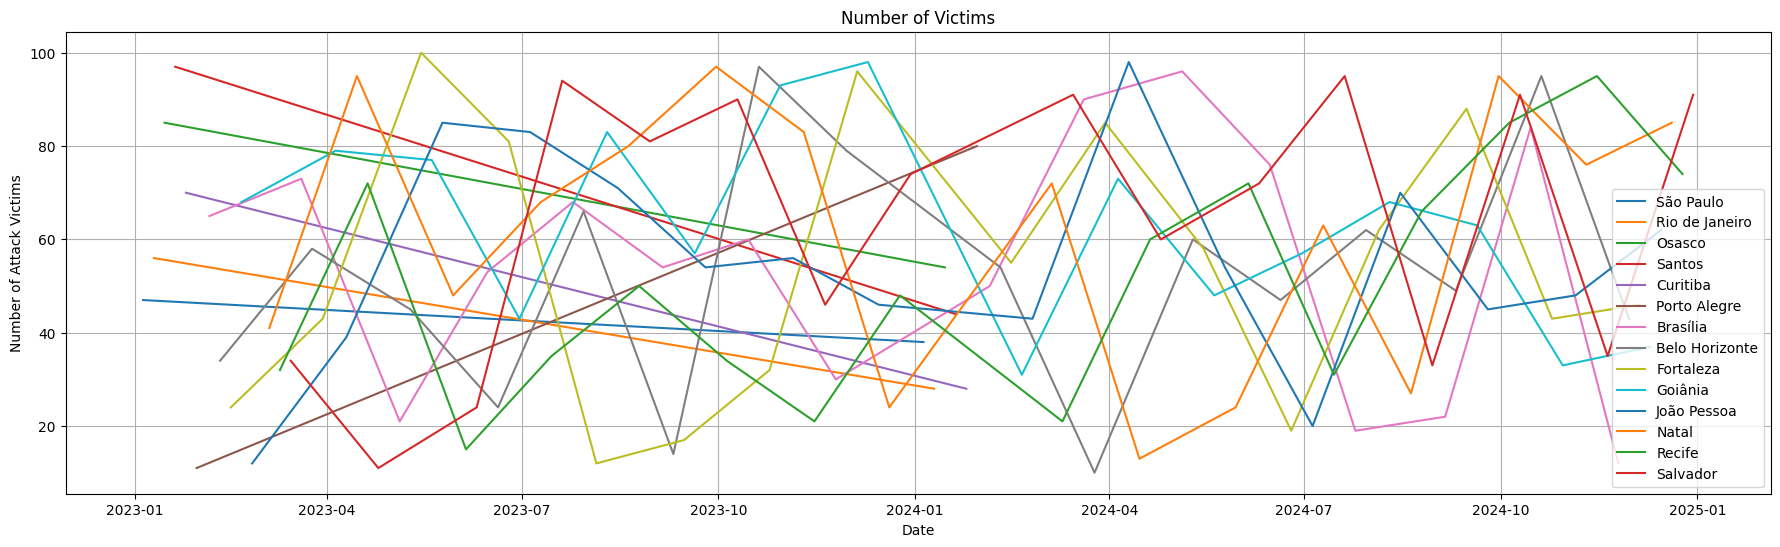

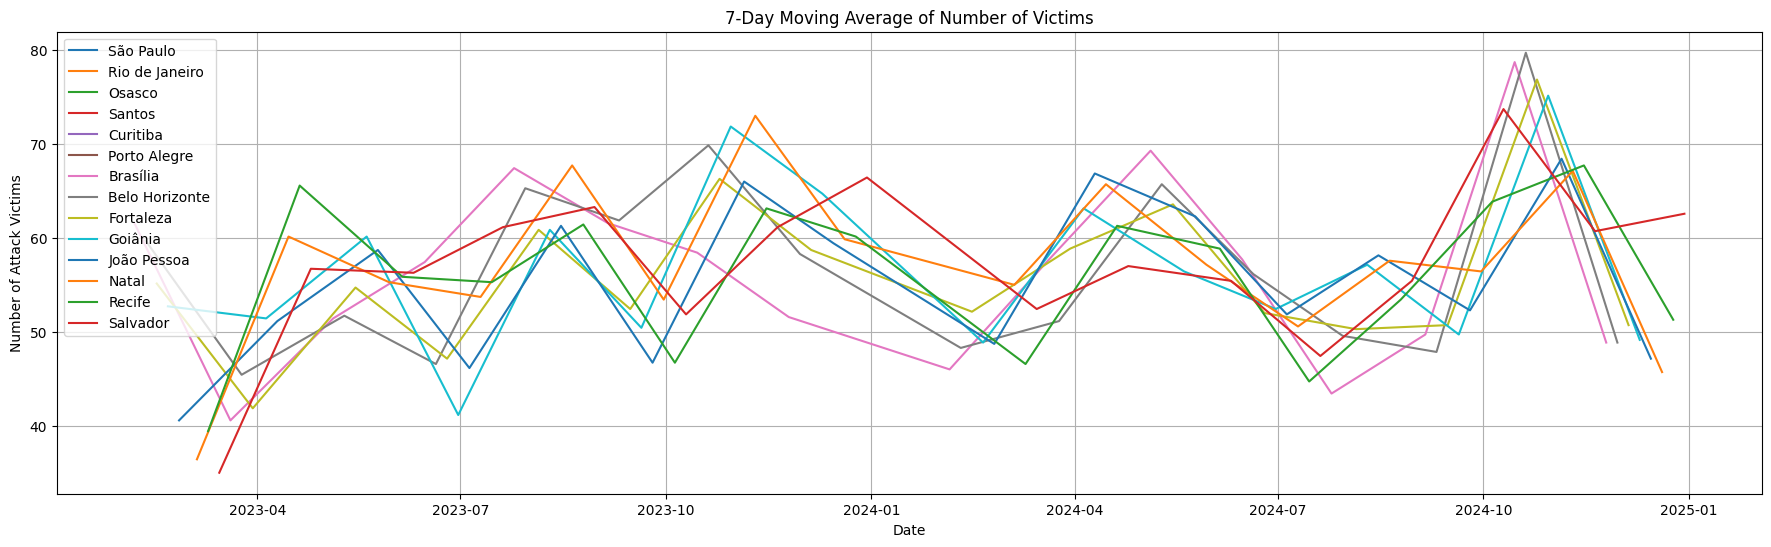

In [9]:
#-Calcule e plote a média móvel de 7 dias do número de vítimas para suavizar os dados.

df['7_days_moving_avarage'] = df['ataque_vitimas'].rolling(window=7).mean()
figure = plt.figure(figsize=(22,6))
ax = figure.add_subplot()
ma_figure = plt.figure(figsize=(22,6))
ma_ax = ma_figure.add_subplot()

#Original number of victims(opcional)
for city in df['cidade'].unique():
    filtering_city = df[df['cidade']==city]
    ax.plot(filtering_city['data'], filtering_city['ataque_vitimas'], label=city, linestyle='-')
ax.set_title('Number of Victims')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Attack Victims')
ax.grid(True)
ax.legend()

#7 days moving avarage
for city in df['cidade'].unique():
    filtering_city = df[df['cidade']==city]
    ma_ax.plot(filtering_city['data'], filtering_city['7_days_moving_avarage'],label=city,  linestyle='-')
ma_ax.set_title('7-Day Moving Average of Number of Victims')
ma_ax.set_xlabel('Date')
ma_ax.set_ylabel('Number of Attack Victims')
ma_ax.grid(True)
ma_ax.legend()

figure.show(False)
ma_figure.show(False)

In [10]:
# Crie um mapa que mostre a localização de todos os ataques alienígenas nas cidades.
attack_map = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=5)

for index, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['cidade'] + ' Victims: ' + str(row['ataque_vitimas']),
        icon=folium.Icon(icon='cloud')
    ).add_to(attack_map)

attack_map.save('attack_locations_map.html')
attack_map

In [11]:
#-Com base na análise dos dados, forneça recomendações ao Comando Terrestre sobre quais cidades precisam de proteção urgente e quais podem ser consideradas menos prioritárias. 

#De acordo com a análise de dados, podemos concluir que em média temos 6 ataques mensais em 14 capitais brasileiras. Também podemos notar que o número de vítimas é maior em cidades costeiras como Santos, Rio de Janeiro, João Pessoa e Salvador.
#Sendo assim, minha sugestão é priorizar as cidades costeiras para diminuir o número de vítimas e proteger os portos para chegada de possíveis suprimentos e também capitais onde o poder econômico e político se encontram.
#Logo a lista de prioridades é: Brasília, São Paulo, Santos, Salvador, João Pessoa e Rio de Janeiro. As 8 cidades seguintes são menos prioritárias e podem optar por um plano de evacuação para sua segurança.